# CS229, Fall 2017
## Problem Set 2: Supervised Learning II
### 1. Logistic Regression: Training stability

#### (a)
The most notable difference is that training the model on dataset A is far quicker than training the model on dataset B.

#### (b)
Let's first load the data in and visualize it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_a = np.loadtxt('./data/data_a.txt')
label_a = data_a[:, 0]
data_a = data_a[:, 1:]
print(label_a.shape)
print(data_a.shape)

(100,)
(100, 2)


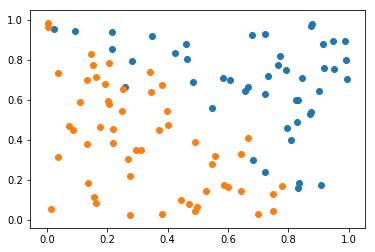

In [3]:
# plot the training data of a
indice = np.argwhere(label_a == 1)
plt.scatter(data_a[indice, 0], data_a[indice, 1])
indice = np.argwhere(label_a == -1)
plt.scatter(data_a[indice, 0], data_a[indice, 1])

In [4]:
data_b = np.loadtxt('./data/data_b.txt')
label_b = data_b[:, 0]
data_b = data_b[:, 1:]
print(label_b.shape)
print(data_b.shape)

(100,)
(100, 2)


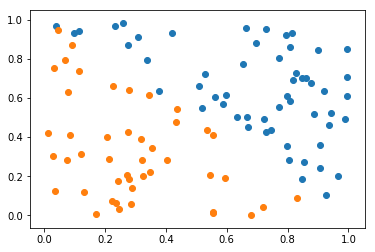

In [5]:
# plot the training data of b
indice = np.argwhere(label_b == 1)
plt.scatter(data_b[indice, 0], data_b[indice, 1])
indice = np.argwhere(label_b == -1)
plt.scatter(data_b[indice, 0], data_b[indice, 1])

In [13]:
from __future__ import division
import numpy as np
import os

try:
    xrange
except NameError:
    xrange = range


def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X


def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y


def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y, num=6):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    count = 0
    if num == 6:
        _, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
    else:
        _, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,15))
    axes = axes.ravel()
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * (grad)
        norm = np.linalg.norm(prev_theta - theta)
        if i % 10000 == 0:
            # plot the data out
            axe = axes[count]
            indice = np.argwhere(Y == 1)
            axe.scatter(X[indice, 1], X[indice, 2])
            indice = np.argwhere(Y == -1)
            axe.scatter(X[indice, 1], X[indice, 2])
            pts = np.linspace(0, 1)
            axe.plot(pts, -theta[0] / theta[2] - pts * theta[1] / theta[2])
            count += 1
            if count == num:
                break
            print('Finished {0} iterations; Diff theta: {1}; theta: {2}; Grad: {3}'.format(
                i, norm, theta, grad))
        if norm < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return

==== Training model on data set A ====
Finished 10000 iterations; Diff theta: 7.226491864936692e-07; theta: [-20.81394174  21.45250215  19.85155266]; Grad: [ 4.15154546e-08 -4.27822247e-08 -4.08456455e-08]
Finished 20000 iterations; Diff theta: 5.3329785269148335e-11; theta: [-20.81437785  21.45295156  19.85198173]; Grad: [ 3.06367123e-12 -3.15717157e-12 -3.01431501e-12]


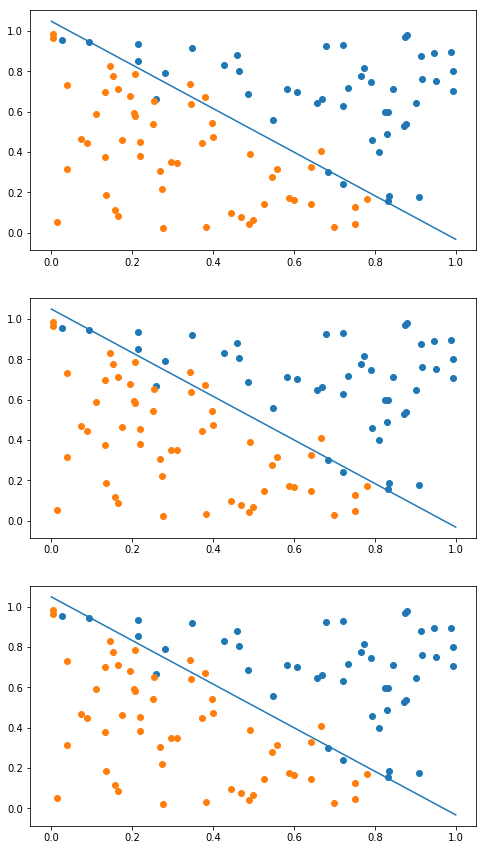

In [14]:
 print('==== Training model on data set A ====')
Xa, Ya = load_data('./data/data_a.txt')
logistic_regression(Xa, Ya, 3)


==== Training model on data set B ====
Finished 10000 iterations; Diff theta: 0.003361039469518825; theta: [-52.74109217  52.92982273  52.69691453]; Grad: [ 0.00019399 -0.00019355 -0.00019461]
Finished 20000 iterations; Diff theta: 0.002173205351041188; theta: [-68.10040977  68.26496086  68.09888223]; Grad: [ 0.00012541 -0.00012529 -0.0001257 ]
Finished 30000 iterations; Diff theta: 0.0016644896054955345; theta: [-79.01759142  79.17745526  79.03755803]; Grad: [ 9.60445104e-05 -9.60553587e-05 -9.61981110e-05]
Finished 40000 iterations; Diff theta: 0.00137040952812708; theta: [-87.70771189  87.87276307  87.73897393]; Grad: [ 7.90651647e-05 -7.91523106e-05 -7.91443884e-05]
Finished 50000 iterations; Diff theta: 0.0011758957242939641; theta: [-95.01838735  95.1948202   95.0551918 ]; Grad: [ 6.78328688e-05 -6.79700947e-05 -6.78680755e-05]


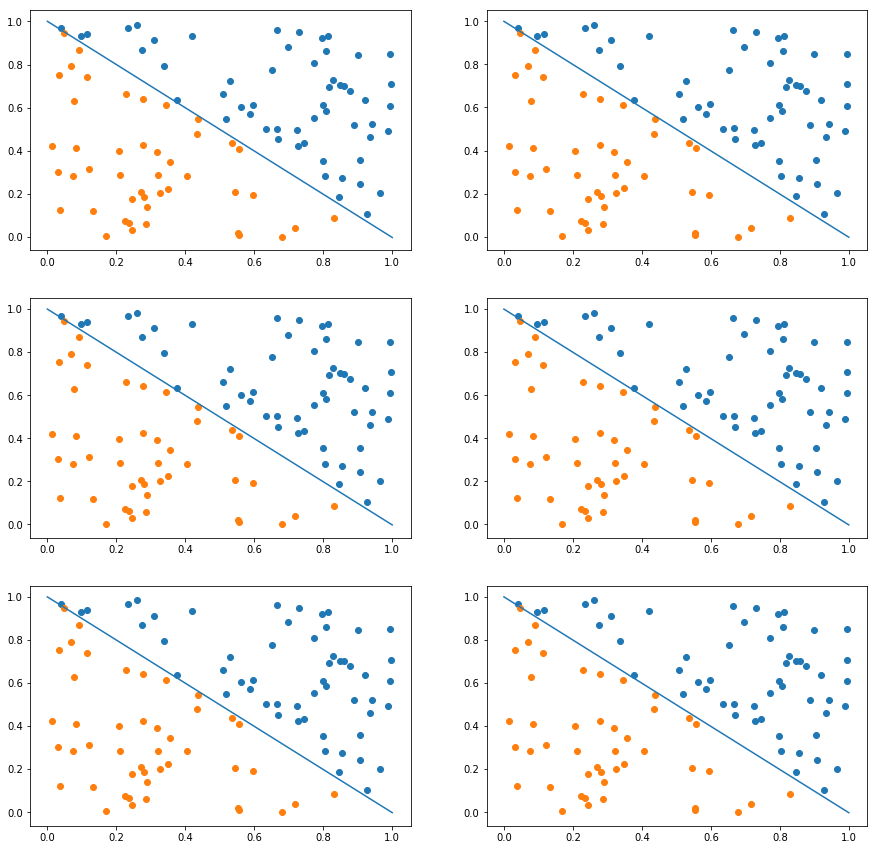

In [8]:
print('\n==== Training model on data set B ====')
Xb, Yb = load_data('./data/data_b.txt')
logistic_regression(Xb, Yb, 6)

From the result above, we can see that, even throught the iteration is continuing, the result classification hyperplane barely changes. But I also noticed that, althrough the hyperplane itself doesn't change much, the corresponding $\theta$ is increasing. The reason for that is because the dataset B is perfectly linear separable, and the algorithm find a line that separate all data points really quickly, so for the log likelihood which we are trying to maximize:
$$\ell(\theta)=\sum_{i=1}^my^{(i)}\log h(x^{(i)})+(1-y^{(i)})\log(1- h(x^{(i)}))$$
Because every point has been separated correctly, by simply increasing the absolute value of $\theta$, we get a $h(x^{(i)})$ that is closer to 1 (for positive case) or 0 (for negative case), which increase the value of log likelihood. So our algorithm will continue increasing the absolute value of $\theta$ and is not likely to stop.  
However, for dataset A, because it is not perfectly linear separable, we can't find a hyperplane that can classificate all points correctly. So if we increase the absolute value of $\theta$, for **some** positive cases $h(x^{(i)})$ will be closer to 0 and for **some** negative cases will be closer to 1, which decrease the log likelihood. As a result, the algorithm will stop.

#### (c)

##### (i)
Won't help, because larger $\theta$ still means larger log likelihood.

##### (ii)
*Different answer here*  
This will help, because as learning rate decreasing, the difference between two rounds' $\theta$ will also decrease, which leads to convergence.

##### (iii)
This will help, because adding $||\theta||_2^2$ will make our algorithm perfers smaller $\theta$, so the algorithm will not increase $\theta$ Infinity.

##### (iv)
Won't help, still we can't prevent the algorithm from increasing $\theta$.

##### (v)
This will help, because adding random zero-mean Gaussian noise will make datasets like B not perfectly linear separable. As the result, we can't increase $\theta$ to obtain a larger log likelihood.

#### (d)
For SVM, datasets like B will not cause any problem. For hinge loss:
$$\ell(\theta)=\max(0,1-y\hat{y})$$
If the predicted result $\hat{y}$ is high, the corresponding loss will be 0. So changing the paramerts to make $\hat{y}$ higher or lower will have no effects after $\hat{y}$ is huge enough.  

There is also another explanation, corresponding to maximizing margin. For SVM, our goal is to maximize geometry margin, which is defined as:
$$\gamma=\min_{i=1}^ny(\frac{w}{||w||}^{\mathrm T}x^{(i)}+\frac{b}{||b||})$$
which is irrelevant to $\theta=({\bf {w}}, b)$